## Importing the ZipFile

In [ ]:
import tarfile
import zipfile
file = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/NLP Projects/amazon_review_polarity_csv.tgz.zip")
file.extractall()
file.close()

## Importing the tarFile

In [ ]:
file_tar = tarfile.open(name = "/content/amazon_review_polarity_csv.tgz", mode = "r")
file_tar.extractall()
file_tar.close()

## Reading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Packages for Machine Learning

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
import bz2, emoji
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/amazon_review_polarity_csv/train.csv", header = None)
df.head()

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [ ]:
df.columns = ["target", "title", "reviews"]
df.head()

,target,title,reviews
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [ ]:
df = df.drop("reviews", axis = 1)

In [ ]:
df.head()

,target,title
0,2,Stuning even for the non-gamer
1,2,The best soundtrack ever to anything.
2,2,Amazing!
3,2,Excellent Soundtrack
4,2,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   target  int64 
 1   title   object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB


In [ ]:
df.shape

(3600000, 2)

In [ ]:
df.isnull().sum()

target     0
title     77
dtype: int64

In [ ]:
df.isna().sum()

target     0
title     77
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df = df.sample(frac=0.05)
df.shape

(179996, 2)

## Clean the data

In [ ]:
df["title"] = df["title"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179996 entries, 3461279 to 1901390
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  179996 non-null  int64 
 1   title   179996 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.1+ MB


In [ ]:
def clean_data(df, field):

  df[field] = df[field].str.replace(r"@", " at ")
  df[field] = df[field].str.replace(r"\W+", " ")
  df[field] = df[field].str.replace(r"http\S+", "")
  df[field] = df[field].str.lower()
  return df

In [ ]:
clean_data(df, "title")

<ipython-input-19-638262d9ce99>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace(r"\W+", " ")
<ipython-input-19-638262d9ce99>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace(r"http\S+", "")


,target,title
3461279,1,cds a better buy this is a copout
29718,2,new nightmare
154108,2,as spected
1860296,1,bad bad and bad
3195871,2,great read
...,...,...
670859,1,i m always complaining when this junk comes on...
645522,2,good reading
2196466,2,i can watch these over and over again
270474,1,okay love story annoying historical inaccuracies


## Preprocessing the data

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
# Removing the punctuations
def remove_punctuations(data):

  punc_tag = re.compile(r"[^\w\s]")
  data = punc_tag.sub(r"", data)
  return data

In [ ]:
# Removing HTML syntaxes
def remove_html(data):

  html = re.compile(r'<.*?>')
  data = html.sub(r'', data)
  return data


In [ ]:
# Removing URL data
def remove_url(data):

  url = re.compile(r"https://\S+ | www\.\S+")
  data = url.sub(r'', data)
  return data

In [ ]:
# Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0" 
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    # data = re.sub(emoji.get_emoji_regexp(),"",data) # This line is for the emoji removal part
    return data

In [ ]:
# Lemmatize the corpus
# lemmatizer = WordNetLemmatizer()
def lemmatize_text(data):

    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

In [ ]:
df.head()

,target,title
3461279,1,cds a better buy this is a copout
29718,2,new nightmare
154108,2,as spected
1860296,1,bad bad and bad
3195871,2,great read


In [ ]:
df["title_clean"] = df["title"].apply(lambda x: remove_punctuations(x))
df.head()

,target,title,title_clean
3461279,1,cds a better buy this is a copout,cds a better buy this is a copout
29718,2,new nightmare,new nightmare
154108,2,as spected,as spected
1860296,1,bad bad and bad,bad bad and bad
3195871,2,great read,great read


In [ ]:
df["title_clean"] = df["title_clean"].apply(lambda x: remove_emoji(x))
df.head()

,target,title,title_clean
3461279,1,cds a better buy this is a copout,cds a better buy this is a copout
29718,2,new nightmare,new nightmare
154108,2,as spected,as spected
1860296,1,bad bad and bad,bad bad and bad
3195871,2,great read,great read


In [ ]:
df["title_clean"] = df["title_clean"].apply(lambda x: remove_html(x))
df.head()

,target,title,title_clean
3461279,1,cds a better buy this is a copout,cds a better buy this is a copout
29718,2,new nightmare,new nightmare
154108,2,as spected,as spected
1860296,1,bad bad and bad,bad bad and bad
3195871,2,great read,great read


In [ ]:
df["title_clean"] = df["title_clean"].apply(lambda x: remove_url(x))

In [ ]:
df["title_clean"] = df["title_clean"].apply(lambda x: lemmatize_text(x))
df.head()

,target,title,title_clean
3461279,1,cds a better buy this is a copout,cds a better buy this is a copout
29718,2,new nightmare,new nightmare
154108,2,as spected,as spected
1860296,1,bad bad and bad,bad bad and bad
3195871,2,great read,great read


In [ ]:
df.target.replace({1:0,2:1},inplace=True)
df.head()

,target,title,title_clean
3461279,0,cds a better buy this is a copout,cds a better buy this is a copout
29718,1,new nightmare,new nightmare
154108,1,as spected,as spected
1860296,0,bad bad and bad,bad bad and bad
3195871,1,great read,great read


In [ ]:
df = df[["target","title_clean"]]
df.head(10)

,target,title_clean
3461279,0,cds a better buy this is a copout
29718,1,new nightmare
154108,1,as spected
1860296,0,bad bad and bad
3195871,1,great read
3292979,0,waste of time
549434,0,great movie horrible transfer
1905046,0,extreme bias
1892584,1,great for the kids
764284,0,blah blah


In [ ]:
X = df["title_clean"]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
display(X_train.shape)
display(X_test.shape)

(125997,)

(53999,)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)

## Deep Learning

In [ ]:
# construct model
BATCH_SIZE = 32

model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          2170048   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,314,977
Trainable params: 2,314,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [ ]:
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/15
3938/3938 [==============================] - 55s 12ms/step - loss: 0.3808 - accuracy: 0.8189 - val_loss: 0.3525 - val_accuracy: 0.8362
Epoch 2/15
3938/3938 [==============================] - 51s 13ms/step - loss: 0.2730 - accuracy: 0.8837 - val_loss: 0.3542 - val_accuracy: 0.8423
Epoch 3/15
3938/3938 [==============================] - 47s 12ms/step - loss: 0.2149 - accuracy: 0.9121 - val_loss: 0.3964 - val_accuracy: 0.8386
Epoch 4/15
3938/3938 [==============================] - 46s 12ms/step - loss: 0.1734 - accuracy: 0.9309 - val_loss: 0.4148 - val_accuracy: 0.8387
Epoch 5/15
3938/3938 [==============================] - 46s 12ms/step - loss: 0.1417 - accuracy: 0.9439 - val_loss: 0.4674 - val_accuracy: 0.8350
Epoch 6/15
3938/3938 [==============================] - 47s 12ms/step - loss: 0.1171 - accuracy: 0.9539 - val_loss: 0.5450 - val_accuracy: 0.8288
Epoch 6: early stopping


In [ ]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

1688/1688 [==============================] - 7s 4ms/step
LSTM Recurrent Neural Network baseline: 0.995734393883463
LSTM Recurrent Neural Network: 0.902167446383538


In [ ]:
model.evaluate(X_test_seq_padded, y_test)

1688/1688 [==============================] - 8s 5ms/step - loss: 0.5450 - accuracy: 0.8288


[0.5449628233909607, 0.8287560939788818]

Text(0.5, 1.0, 'Training and Validation Accuracy')

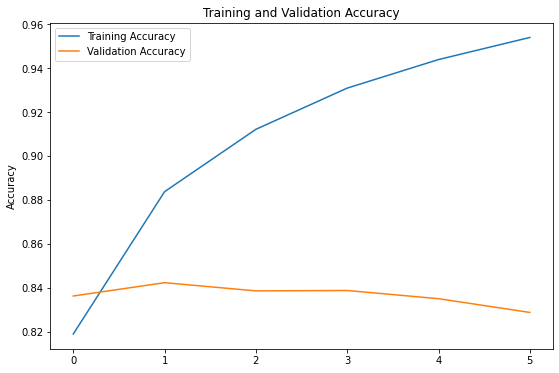

In [ ]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

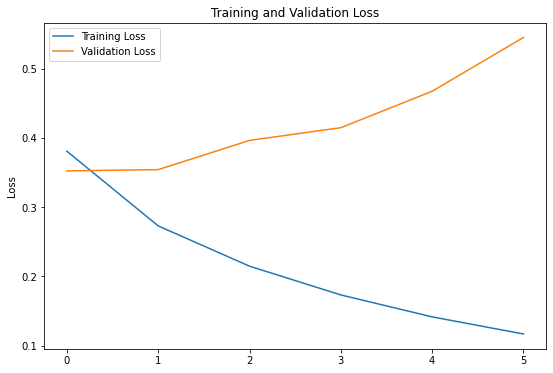

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")